In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.datasets import load_breast_cancer
Breastcancer = load_breast_cancer()

In [22]:
print(Breastcancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [9]:
X = Breastcancer.data

In [ ]:
scale = StandardScaler()
df = pd.DataFrame(data=scale.fit_transform(X),columns=Breastcancer.feature_names)
df.head()

In [19]:
df['Outcome'] = Breastcancer.target

In [20]:
X = df.drop('Outcome',axis=1)

In [23]:
X_train ,X_test , y_train , y_test = train_test_split(X,df['Outcome'],test_size=0.2,random_state=42)

In [27]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
print('Accuracy Before Using Bagging =',accuracy_score(y_test,lr.predict(X_test)))

Accuracy Before Using Bagging = 0.9736842105263158


In [29]:
lr2 = LogisticRegression()
bg = BaggingClassifier(lr2,n_estimators=25)

In [30]:
bg.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=25, n_jobs=None,
                  oob_score=False, random_state=None,

In [31]:
print('Accuracy after using Bagging Classifier =',accuracy_score(y_test,bg.predict(X_test)))

Accuracy after using Bagging Classifier = 0.9736842105263158


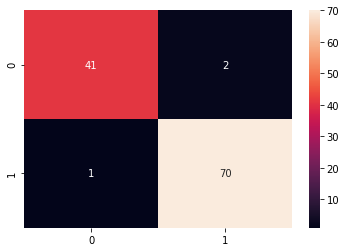

In [32]:
sns.heatmap(confusion_matrix(y_test,bg.predict(X_test)),annot=True)
plt.show()

In [33]:
print(classification_report(y_test,bg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [34]:
import pickle
pickle.dump(bg, open('/content/drive/MyDrive/ML-Notebooks/MODELS/Bagged-Model-Ex-2.pkl', 'wb'))